# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

#### Submitted by Subodh Nath Pushpak

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
# running from local 

### Change current working directory to project folder (1 mark)

In [2]:
import os
import pandas as pd
import cv2
#### Add your code here ####
#os.chdir('/content/drive/My Drive/AIML/SubodhPushpak/FaceMask/') # running from local 


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
import numpy as np
#data = #### Add your code here ####
data= np.load('images.npy',allow_pickle=True)

In [4]:
print('number of images in the given dataset is: ',data.shape[0])

number of images in the given dataset is:  409


### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [5]:
print (data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


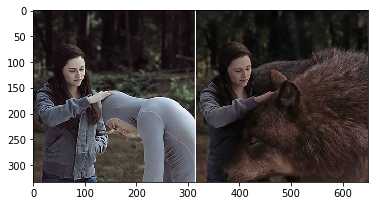

In [52]:
#### Add your code here ####
from matplotlib import pyplot as plt 
plt.imshow(data[0][0])

Image index number:  229


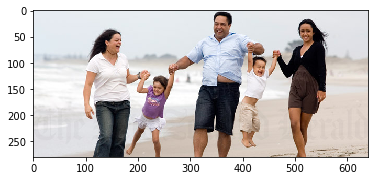

In [54]:
img_num=np.random.randint(0,data.shape[0])
plt.imshow(data[img_num][0])
print('Image index number: ',img_num)

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [8]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [9]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [10]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [11]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

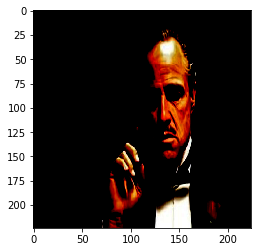

In [12]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

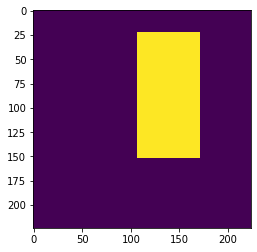

In [13]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [14]:

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA = 1.0 

def create_model(trainable=True):
    #model = #### Add your code here ####
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

     # Add all the UNET layers here
    #### Add your code here ####
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)  #### Add your code here ####

#### The trick is to create UNET with layers conv_pw_1_relu, conv_pw_3_relu, conv_pw_5_relu, conv_pw_11_relu, conv_pw_13_relu so that it produces 224 x 224 image back

### Call the create_model function

In [15]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________________

In [16]:
print("Number of layers in the base model: ", len(model.layers))

Number of layers in the base model:  98


### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [17]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [18]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())  #### Add your code here ####

### Define loss

In [19]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [20]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [22]:
X_train.shape

(409, 224, 224, 3)

In [23]:
masks.shape

(409, 224, 224)

In [24]:
#### Add your code here ####
epochs= 4
batch_size=1
model.fit(X_train, masks, epochs=epochs, batch_size=batch_size,  callbacks=[checkpoint, reduce_lr, stop], verbose=1)

Train on 409 samples
Epoch 1/4
408/409 [============================>.] - ETA: 2s - loss: 1.3298 - dice_coefficient: 0.4449
Epoch 00001: loss improved from inf to 1.32871, saving model to model-1.33.h5
409/409 [==============================] - 837s 2s/sample - loss: 1.3287 - dice_coefficient: 0.4452
Epoch 2/4
408/409 [============================>.] - ETA: 1s - loss: 0.8021 - dice_coefficient: 0.6097
Epoch 00002: loss improved from 1.32871 to 0.80231, saving model to model-0.80.h5
409/409 [==============================] - 814s 2s/sample - loss: 0.8023 - dice_coefficient: 0.6094
Epoch 3/4
408/409 [============================>.] - ETA: 1s - loss: 0.6457 - dice_coefficient: 0.6676
Epoch 00003: loss improved from 0.80231 to 0.64729, saving model to model-0.65.h5
409/409 [==============================] - 807s 2s/sample - loss: 0.6473 - dice_coefficient: 0.6667
Epoch 4/4
408/409 [============================>.] - ETA: 1s - loss: 0.5654 - dice_coefficient: 0.7009
Epoch 00004: loss improve

### Get the predicted mask for a sample image   (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


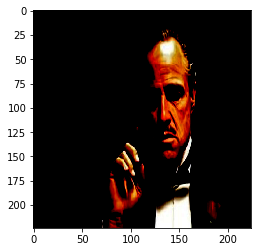

In [25]:
n = 10
sample_image = X_train[n]

#### Add your code here ####
THRESHOLD = 0.8
image = cv2.resize(sample_image, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = model.predict(x=np.array([feat_scaled]))[0]

output = np.zeros(sample_image.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
            cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)
            output[y:y2, x:x2] = 1

contours, hierarchy = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(sample_image)

### Impose the mask on the image (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


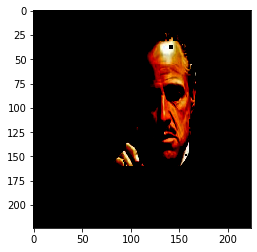

In [26]:
#### Add your code here ####
image2 = X_train[n]
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image2]))[0] > 0.3), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)

In [27]:
def displayImagewithFaceMask(img_num):
    plt.figure(figsize= (10,10))  
    plt.subplot(1, 2, 1)
    plt.imshow(data[img_num][0])
  

    unscaled = data[img_num][0] #cv2.imread(filename)
    image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
    feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

    pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

    image2 = image
    image2[:,:,0] = pred_mask*image[:,:,0]
    image2[:,:,1] = pred_mask*image[:,:,1]
    image2[:,:,2] = pred_mask*image[:,:,2]

    out_image = image2

    plt.subplot(1, 2, 2)
    plt.imshow(out_image)
    print('Image index number: ',img_num)

Image index number:  10


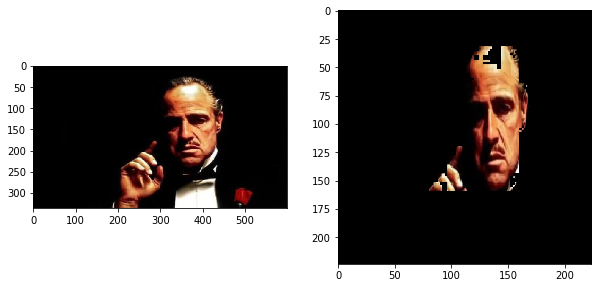

In [28]:
img_num= 10 #np.random.randint(0,data.shape[0])
displayImagewithFaceMask(img_num)

### Save .h5 file, and  use pretrained weights

In [33]:
WEIGHTS_FILE = "model-0.57.h5"
model.save(WEIGHTS_FILE)

In [34]:
THRESHOLD = 0.8
EPSILON = 0.02

modelfromh5 = create_model()
modelfromh5.load_weights(WEIGHTS_FILE)

Image index number:  234


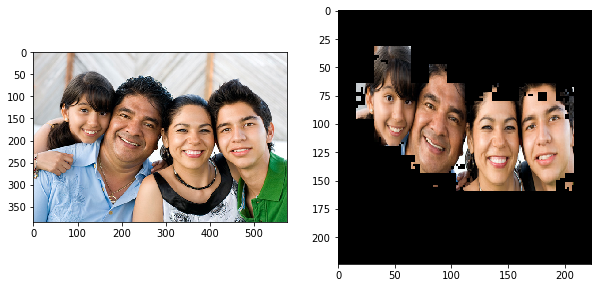

In [37]:
img_num= 234 #np.random.randint(0,data.shape[0])
displayImagewithFaceMask(img_num)

Image index number:  171


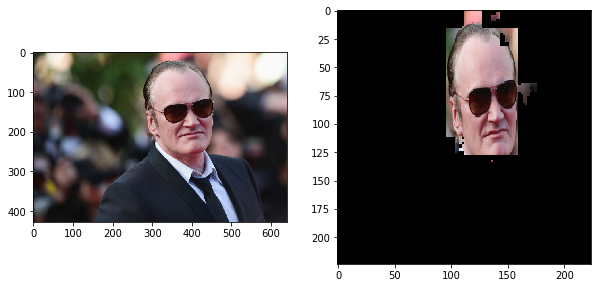

In [51]:
img_num= np.random.randint(0,data.shape[0])
displayImagewithFaceMask(img_num)